# Project Stage - II (Data Modeling)

## Task 1
## Member


## Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

* In this stage of the project, the following libraries are imported for data analysis and plotting:
  * Pandas
  * NumPy
  * Plotly
* The above cell contains the import statements for these libraries, indicating their usage in the data analysis and visualization tasks within the project.

In [2]:
cases= pd.read_csv("covid_confirmed_usafacts.csv")# reading confirmed cases.csv file
deaths = pd.read_csv("covid_deaths_usafacts.csv")# reading confirmed death cases.csv file
population=pd.read_csv("covid_county_population_usafacts.csv")# reading us population.csv file

* In the above cell the data from a CSV file is read using the pd.read_csv function. This function is part of the Pandas library, and it allows the project to import and utilize the data stored in the CSV file for subsequent analysis.
#### Conditions for filtering columns and rows

In [3]:
start_date= '2020-07-06' # start date from july 6th monday
end_date= '2020-12-27'   # end date on december 27th sunday

condition = cases['State'] == "SC"  #filtering the rows with state carolina for cases data
condition1= deaths['State'] == "SC"  #filtering the rows with state carolina for deathn data

* For the analysis of the data, the specified requirements are as follows:

  * If the first date in July 2020 is not a Monday, the analysis should commence from the first Monday in July. The analysis should extend until the last Sunday in December 2020.
* The start date and end date are stored in variables for future use in the data analysis.
* Additionally, specific rows in the data can be filtered based on certain conditions set initially.
#### Filtering date columns

In [4]:
date_columns = cases.columns[(cases.columns >= start_date) & (cases.columns <= end_date)]


* The data is filtered based on the specified start and end dates. 
* This involves selecting columns that fall within the time range from the first Monday in July 2020 to the last Sunday in December 2020. 

#### Initializing dataframes to store weekly mean of all counties in SC

In [5]:
weekly_mean_c = pd.DataFrame() # to store mean of all counties of SC in the given timeline
weekly_median_c =pd.DataFrame() # to store median of all counties of SC in the given timeline
weekly_mode_c=pd.DataFrame() # to store mode of all counties of SC in the given timeline

* Creating dataframes to store mean median and mode values for the cases registered across SC
#### Looping over the data to calculate weekly mean median and mode values for counties

In [6]:
for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))

    # selecting columns for the current week
    current_week_columns = date_columns[week_start:week_end]

    # adding mean, median, and mode of values for the current week and repeating for every week
    weekly_mean_c[f'Mean_c_{i//7 + 1}'] = cases.loc[condition, current_week_columns].mean(axis=1)
    weekly_median_c[f'Median_c_{i//7 + 1}'] = cases.loc[condition, current_week_columns].median(axis=1)
    weekly_mode_c[f'Mode_c_{i//7 + 1 }'] = cases.loc[condition, current_week_columns].mode(axis=1).iloc[:, 0]


* The objective was to produce weekly statistics for cases. 
* In the code snippet above, we employed a for loop to traverse through the dates and compute the statistics (mean, median, mode) for each week within the specified timeframe.
#### Displaying head() of the calculated weekly mean for cases

In [7]:
weekly_mean_c.head()#weekly mean for all counties of Sc for cases

,Mean_c_1,Mean_c_2,Mean_c_3,Mean_c_4,Mean_c_5,Mean_c_6,Mean_c_7,Mean_c_8,Mean_c_9,Mean_c_10,...,Mean_c_16,Mean_c_17,Mean_c_18,Mean_c_19,Mean_c_20,Mean_c_21,Mean_c_22,Mean_c_23,Mean_c_24,Mean_c_25
2356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2357,141.000000,171.571429,254.000000,278.857143,313.142857,351.714286,375.714286,398.285714,447.000000,475.285714,...,727.000000,779.428571,821.000000,854.571429,878.000000,942.571429,996.571429,1074.285714,1142.714286,1214.000000
2358,584.857143,888.285714,1112.285714,1379.714286,1655.571429,2016.428571,2188.000000,2293.571429,2402.285714,2477.571429,...,4859.571429,5047.000000,5282.285714,5545.714286,5794.857143,6247.000000,6606.285714,7234.285714,7926.857143,8531.571429
2359,72.571429,103.000000,134.714286,169.428571,205.857143,240.142857,261.285714,284.000000,299.000000,314.285714,...,424.000000,424.000000,431.285714,438.857143,441.142857,443.714286,450.285714,463.857143,477.857143,494.285714
2360,910.714286,1236.857143,1566.142857,1898.000000,2232.857143,2494.285714,2757.714286,3020.285714,3274.857143,3486.857143,...,5388.142857,5829.428571,6269.000000,6749.142857,7162.857143,7826.571429,8393.000000,9181.714286,10092.428571,11063.142857


* Once we obtain weekly statistics for cases, a dataframe is generated where each week is labeled, and the corresponding values are stored. 
* The presented data pertains specifically to the weekly mean for cases. 
* These weekly mean values represent the cases data for all counties in the state of South Carolina.
* Similarly, the median and mode values are calculated and stored in the dataframe alongside the weekly mean values. 

In [8]:
#weekly_median_c.head() #weekly median for all counties of Sc for cases

In [9]:
#weekly_mode_c.head() #weekly mode for all counties of Sc for cases

#### Displaying total mean of cases of SC for every week

In [10]:
mean_columns = weekly_mean_c.mean(axis=0) #weekly mean of Sc for cases
print(mean_columns)

Mean_c_1     1082.279635
Mean_c_2     1359.246201
Mean_c_3     1623.750760
Mean_c_4     1848.547112
Mean_c_5     2051.325228
Mean_c_6     2213.534954
Mean_c_7     2328.270517
Mean_c_8     2450.528875
Mean_c_9     2594.480243
Mean_c_10    2720.617021
Mean_c_11    2878.328267
Mean_c_12    3034.510638
Mean_c_13    3166.978723
Mean_c_14    3292.650456
Mean_c_15    3426.413374
Mean_c_16    3563.744681
Mean_c_17    3715.407295
Mean_c_18    3874.346505
Mean_c_19    4058.395137
Mean_c_20    4228.452888
Mean_c_21    4521.082067
Mean_c_22    4764.875380
Mean_c_23    5164.030395
Mean_c_24    5610.963526
Mean_c_25    6052.112462
dtype: float64


* We computed the weekly mean for each county in South Carolina using the weekly_mean_c variable. 
* Subsequently, the overall state mean across all weeks was obtained using the mean() function. 
* These mean values are stored in mean_columns, providing a clear representation of weeks and their corresponding mean values. 
* In a similar fashion, the median and mode values for cases have been computed and stored in the variables.

In [11]:
median_columns=weekly_median_c.median(axis=0)#weekly median of Sc for cases
#print(median_columns)

In [12]:
mode_columns=weekly_mode_c.mode(axis=0).iloc[0, :] #weekly mode of Sc for cases
#print(mode_columns)

#### Ploting Mean, Median, Mode of cases across SC

In [13]:
# ploting the graph plots using plotly
fig = px.line(x=mean_columns.index, y=[mean_columns.values,median_columns.values,mode_columns.values], labels={'x': 'Columns', 'y': 'Mean'},title='Mean Median Mode of cases',markers=True)
custom_legend_labels = ['Mean_cases', 'Median_cases', 'Mode_cases']

fig.update_layout(legend=dict(title="Cases registered in SC", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()

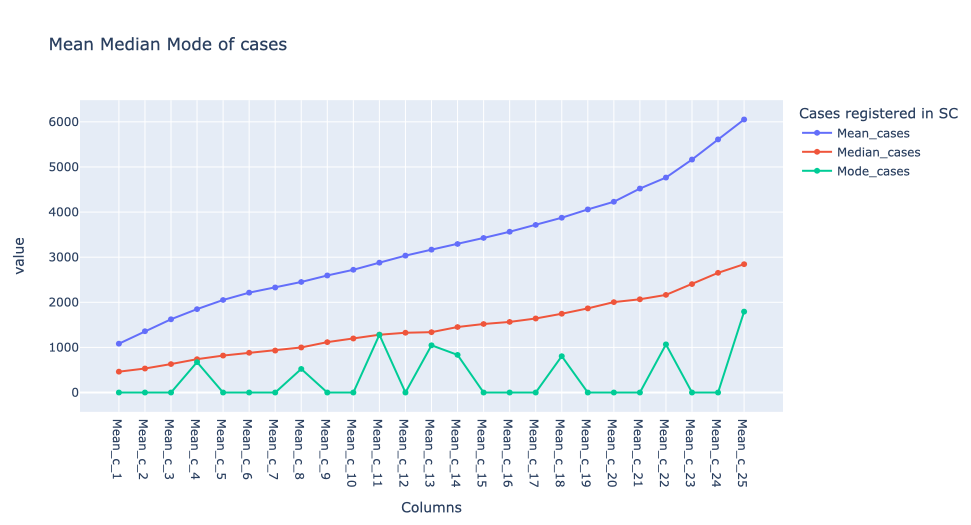
The above graph shows the weekly statistics (mean, median, mode) for number of deaths across Sc state

In [14]:
weekly_mean_d = pd.DataFrame() # to store mean of deaths all counties of SC in the given timeline
weekly_median_d =pd.DataFrame()# to store median of deaths all counties of SC in the given timeline
weekly_mode_d=pd.DataFrame() ## to store mode of deaths all counties of SC in the given timeline

* Creating dataframes to store mean median and mode values for the deaths registered across SC

In [15]:
for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))

    # select columns for the current week
    current_week_columns = date_columns[week_start:week_end]

    # adding mean, median, and mode of values for the current week and repeating for every week
    weekly_mean_d[f'Mean_d_{i//7 + 1}'] = deaths.loc[condition1, current_week_columns].mean(axis=1)
    weekly_median_d[f'Median_d_{i//7 + 1}'] = deaths.loc[condition1, current_week_columns].median(axis=1)
    weekly_mode_d[f'Mode_d_{i//7 + 1}'] = deaths.loc[condition1, current_week_columns].mode(axis=1).iloc[:, 0]

* The objective was to produce weekly statistics for deaths.
* In the code snippet above, we employed a for loop to traverse through the dates and compute the statistics (mean, median, mode) for each week within the specified timeframe.
#### Displaying head() of the calculated weekly mean for deaths

In [16]:
weekly_mean_d.head()#weekly mean for all counties of Sc for deaths

,Mean_d_1,Mean_d_2,Mean_d_3,Mean_d_4,Mean_d_5,Mean_d_6,Mean_d_7,Mean_d_8,Mean_d_9,Mean_d_10,...,Mean_d_16,Mean_d_17,Mean_d_18,Mean_d_19,Mean_d_20,Mean_d_21,Mean_d_22,Mean_d_23,Mean_d_24,Mean_d_25
2356,0.000000,0.000000,0.000000,0.0,35.285714,0.571429,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2357,0.857143,1.000000,1.571429,5.0,7.000000,8.000000,8.857143,10.000000,10.285714,11.000000,...,15.000000,16.571429,18.428571,19.000000,19.000000,22.000000,22.142857,23.000000,23.000000,23.285714
2358,11.142857,12.714286,16.857143,20.0,26.857143,42.428571,51.571429,59.285714,65.857143,71.714286,...,86.142857,87.000000,88.857143,90.857143,93.285714,98.000000,100.285714,108.428571,114.571429,125.142857
2359,3.000000,3.000000,3.000000,3.0,3.000000,5.428571,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.714286,7.285714,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000
2360,16.571429,22.428571,30.571429,41.0,48.714286,70.428571,84.142857,109.000000,125.285714,138.571429,...,198.000000,205.714286,208.142857,209.428571,214.571429,223.142857,233.000000,243.857143,257.428571,269.142857


* Once we obtain weekly statistics for deaths, a dataframe is generated where each week is labeled, and the corresponding values are stored.
* The presented data pertains specifically to the weekly mean for deaths.
* These weekly mean values represent the deaths data for all counties in the state of South Carolina.
* Similarly, the median and mode values are calculated and stored in the dataframe alongside the weekly mean values.

In [17]:
#weekly_median_d.head()#weekly median for all counties of Sc for deaths

In [18]:
#weekly_mode_d.head()#weekly mode for all counties of Sc for deaths

#### Displaying total mean of deaths of SC for every week

In [19]:
mean_columns1 = weekly_mean_d.mean(axis=0)#weekly mean of Sc for deaths
print(mean_columns1)

Mean_d_1      18.972644
Mean_d_2      22.234043
Mean_d_3      27.574468
Mean_d_4      33.714286
Mean_d_5      39.656535
Mean_d_6      46.340426
Mean_d_7      51.167173
Mean_d_8      55.607903
Mean_d_9      59.829787
Mean_d_10     63.382979
Mean_d_11     66.878419
Mean_d_12     69.674772
Mean_d_13     72.200608
Mean_d_14     74.656535
Mean_d_15     76.683891
Mean_d_16     79.589666
Mean_d_17     82.617021
Mean_d_18     84.917933
Mean_d_19     86.884498
Mean_d_20     88.559271
Mean_d_21     92.069909
Mean_d_22     95.054711
Mean_d_23     98.781155
Mean_d_24    102.890578
Mean_d_25    107.386018
dtype: float64


* We computed the weekly mean for each county in South Carolina using the weekly_mean_d variable. 
* Subsequently, the overall state mean across all weeks was obtained using the mean() function. 
* These mean values are stored in mean_columns1, providing a clear representation of weeks and their corresponding mean values. 
* In a similar fashion, the median and mode values for deaths have been computed and stored in the variables.

In [20]:
median_columns1=weekly_median_d.median(axis=0)#weekly median of Sc for deaths
#print(median_columns1)

In [21]:
mode_columns1=weekly_mode_d.mode(axis=0).iloc[0, :]#weekly mode of Sc for deaths
#print(mode_columns1)

#### Ploting Mean, Median, Mode of deaths across SC

In [22]:
# ploting the graph plots using plotly
fig = px.line(x=mean_columns1.index, y=[mean_columns1.values,median_columns1.values,mode_columns1.values], labels={'x': 'Columns', 'y': 'Mean'},title='Mean, Median, Mode of deaths',markers=True)
custom_legend_labels = ['Mean_deaths', 'Median_deaths', 'Mode_deaths']

fig.update_layout(legend=dict(title="Deaths in SC", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()


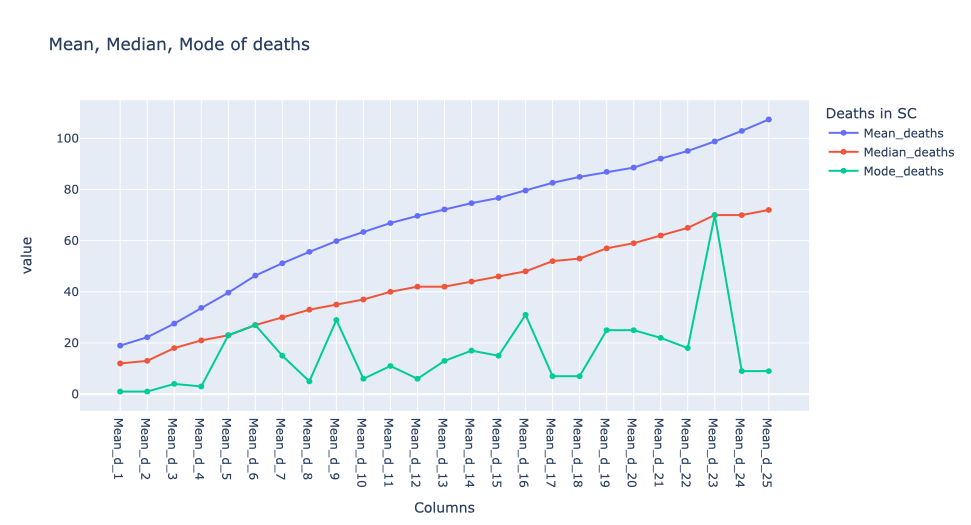
#### The above graph shows the weekly statistics (mean, median, mode) for number of deaths across Sc state

# Compare the data against other states (compare against 5 states)


* For this assignment, the task involves choosing any five states from the United States.
* In fulfillment of this task, the selected states are as follows:

  * NC - North Carolina
  * AR - Arkansas
  * CO - Colorado
  * ID - Idaho
  * LA - Louisiana
#### Conditions for filtering states

In [23]:
c1=cases['State'] == "NC"
c2=cases['State'] == "AR"
c3=cases['State'] == "CO"
c4=cases['State'] == "ID"
c5=cases['State'] == "LA"

d=deaths['State']=='SC'
d1=deaths['State'] == "NC"
d2=deaths['State'] == "AR"
d3=deaths['State'] == "CO"
d4=deaths['State'] == "ID"
d5=deaths['State'] == "LA"

* Following the selection of the states (NC, AR, CO, ID, LA), the next step involves filtering out the rows corresponding to each specific state. 
* This allows for the segregation of data from each state and perform analysis on a state-by-state basis.
* The provided code snippet outlines conditions and filters to isolate rows specific to each state. 
#### Calculating Mean, Median, Mode of cases for 5 different states

In [24]:
mean_1c = pd.DataFrame()  # to store mean of cases of all counties of NC in the given timeline
median_1c =pd.DataFrame() # to store median of cases of all counties of NC in the given timeline
mode_1c=pd.DataFrame()    # to store mode of cases of all counties of NC in the given timeline
mean_2c = pd.DataFrame()  # to store mean of cases of all counties of AR in the given timeline
median_2c =pd.DataFrame() # to store median of cases of all counties of AR in the given timeline
mode_2c=pd.DataFrame()    # to store mode of cases of all counties of AR in the given timeline
mean_3c = pd.DataFrame()  # to store mean of cases of all counties of CO in the given timeline
median_3c =pd.DataFrame() # to store median of cases of all counties of CO in the given timeline
mode_3c=pd.DataFrame()    #to store mode of cases of all counties of CO in the given timeline
mean_4c = pd.DataFrame()  # to store mean of cases of all counties of ID in the given timeline
median_4c =pd.DataFrame() # to store median of cases of all counties of ID in the given timeline
mode_4c=pd.DataFrame()    #to store mode of cases of all counties of ID in the given timeline
mean_5c = pd.DataFrame()  # to store mean of cases of all counties of LA in the given timeline
median_5c =pd.DataFrame() # to store median of cases of all counties of LA in the given timeline
mode_5c=pd.DataFrame()    #to store mode of cases of all counties of LA in the given timeline



for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))
    
    # Select columns for the current week
    current_week_columns = date_columns[week_start:week_end]

    # adding mean, median, and mode of values for the current week and repeating for every week
    mean_1c[f'Mean_c_{i//7 + 1}'] = cases.loc[c1, current_week_columns].mean(axis=1)
    median_1c[f'Median_c_{i//7 + 1}'] = cases.loc[c1, current_week_columns].median(axis=1)
    mode_1c[f'Mode_c_{i//7 + 1}'] = cases.loc[c1, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_2c[f'Mean_c_{i//7 + 1}'] = cases.loc[c2, current_week_columns].mean(axis=1)
    median_2c[f'Median_c_{i//7 + 1}'] = cases.loc[c2, current_week_columns].median(axis=1)
    mode_2c[f'Mode_c_{i//7 + 1}'] = cases.loc[c2, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_3c[f'Mean_c_{i//7 + 1}'] = cases.loc[c3, current_week_columns].mean(axis=1)
    median_3c[f'Median_c_{i//7 + 1}'] = cases.loc[c3, current_week_columns].median(axis=1)
    mode_3c[f'Mode_c_{i//7 + 1}'] = cases.loc[c3, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_4c[f'Mean_c_{i//7 + 1}'] = cases.loc[c4, current_week_columns].mean(axis=1)
    median_4c[f'Median_c_{i//7 + 1}'] = cases.loc[c4, current_week_columns].median(axis=1)
    mode_4c[f'Mode_c_{i//7 + 1}'] = cases.loc[c4, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_5c[f'Mean_c_{i//7 + 1}'] = cases.loc[c5, current_week_columns].mean(axis=1)
    median_5c[f'Median_c_{i//7 + 1}'] = cases.loc[c5, current_week_columns].median(axis=1)
    mode_5c[f'Mode_c_{i//7 + 1}'] = cases.loc[c5, current_week_columns].mode(axis=1).iloc[:, 0]
    
    
    
mean_c1 = mean_1c.mean(axis=0)           #weekly mean of NC for cases
median_c1=median_1c.median(axis=0)       #weekly median of NC for cases
mode_c1=mode_1c.mode(axis=0).iloc[0, :]  #weekly mode of NC for cases

mean_c2 = mean_2c.mean(axis=0)           #weekly mean of AR for cases
median_c2=median_2c.median(axis=0)       #weekly median of AR for cases
mode_c2=mode_2c.mode(axis=0).iloc[0, :]  #weekly mode of AR for cases

mean_c3 = mean_3c.mean(axis=0)           #weekly mean of CO for cases
median_c3=median_3c.median(axis=0)       #weekly median of CO for cases
mode_c3=mode_3c.mode(axis=0).iloc[0, :]  #weekly mode of CO for cases

mean_c4 = mean_4c.mean(axis=0)           #weekly mean of ID for cases
median_c4=median_4c.median(axis=0)       #weekly median of ID for cases
mode_c4=mode_4c.mode(axis=0).iloc[0, :]  #weekly mode of ID for cases

mean_c5 = mean_5c.mean(axis=0)           #weekly mean of LA for cases
median_c5=median_5c.median(axis=0)       #weekly median of LA for cases
mode_c5=mode_5c.mode(axis=0).iloc[0, :]  #weekly mode of LA for cases

* Similar to the previous process, we employ a loop to calculate the mean, median, and mode values for cases in the five selected states (NC, AR, CO, ID, LA). 
* This allows for the computation of weekly statistics for each state, enabling analysis with the state of South Carolina (SC).

#### Calculating Mean, Median, Mode of deaths for 5 different states

In [25]:
mean_1d = pd.DataFrame()  # to store mean of deaths of all counties of NC in the given timeline
median_1d =pd.DataFrame() # to store median of deaths of all counties of NC in the given timeline
mode_1d=pd.DataFrame()    # to store mode of deaths of all counties of NC in the given timeline
mean_2d= pd.DataFrame()   # to store mean of deaths of all counties of AR in the given timeline
median_2d=pd.DataFrame()  # to store median of deaths of all counties of AR in the given timeline
mode_2d=pd.DataFrame()    # to store mode of deaths of all counties of AR in the given timeline
mean_3d= pd.DataFrame()   # to store mean of deaths of all counties of CO in the given timeline
median_3d=pd.DataFrame()  # to store median of deaths of all counties of CO in the given timeline
mode_3d=pd.DataFrame()    # to store mode of deaths of all counties of CO in the given timeline
mean_4d= pd.DataFrame()   # to store mean of deaths of all counties of ID in the given timeline
median_4d=pd.DataFrame()  # to store median of deaths of all counties of ID in the given timeline
mode_4d=pd.DataFrame()    # to store mode of deaths of all counties of ID in the given timeline
mean_5d= pd.DataFrame()   # to store mean of deaths of all counties of LA in the given timeline
median_5d=pd.DataFrame()  # to store median of deaths of all counties of LA in the given timeline
mode_5d=pd.DataFrame()    # to store mode of deaths of all counties of LA in the given timeline


for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))
    
    # Select columns for the current week
    current_week_columns = date_columns[week_start:week_end]

    # adding mean, median, and mode of values for the current week and repeating for every week
    mean_1d[f'Mean_d_{i//7 + 1}'] = deaths.loc[d1, current_week_columns].mean(axis=1)
    median_1d[f'Median_d_{i//7 + 1}'] = deaths.loc[d1, current_week_columns].median(axis=1)
    mode_1d[f'Mode_d_{i//7 + 1}'] = deaths.loc[c1, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_2d[f'Mean_d_{i//7 + 1}'] = deaths.loc[d2, current_week_columns].mean(axis=1)
    median_2d[f'Median_d_{i//7 + 1}'] = deaths.loc[d2, current_week_columns].median(axis=1)
    mode_2d[f'Mode_d_{i//7 + 1}'] = deaths.loc[d2, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_3d[f'Mean_d_{i//7 + 1}'] = deaths.loc[d3, current_week_columns].mean(axis=1)
    median_3d[f'Median_d_{i//7 + 1}'] = deaths.loc[d3, current_week_columns].median(axis=1)
    mode_3d[f'Mode_d_{i//7 + 1}'] = deaths.loc[d3, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_4d[f'Mean_d_{i//7 + 1}'] = deaths.loc[d4, current_week_columns].mean(axis=1)
    median_4d[f'Median_d_{i//7 + 1}'] = deaths.loc[d4, current_week_columns].median(axis=1)
    mode_4d[f'Mode_d_{i//7 + 1}'] = deaths.loc[c4, current_week_columns].mode(axis=1).iloc[:, 0]
    
    mean_5d[f'Mean_d_{i//7 + 1}'] = deaths.loc[d5, current_week_columns].mean(axis=1)
    median_5d[f'Median_d_{i//7 + 1}'] = deaths.loc[d5, current_week_columns].median(axis=1)
    mode_5d[f'Mode_d_{i//7 + 1}'] = deaths.loc[d5, current_week_columns].mode(axis=1).iloc[:, 0]
    
    
mean_d1 = mean_1d.mean(axis=0)          #weekly mean of NC for deaths
median_d1=median_1d.median(axis=0)      #weekly median of NC for deaths
mode_d1=mode_1d.mode(axis=0).iloc[0, :] #weekly mode of NC for deaths

mean_d2 = mean_2d.mean(axis=0)          #weekly mean of AR for deaths
median_d2=median_2d.median(axis=0)      #weekly median of AR for deaths
mode_d2=mode_2d.mode(axis=0).iloc[0, :] #weekly mode of AR for deaths

mean_d3 = mean_3d.mean(axis=0)          #weekly mean of CO for deaths
median_d3=median_3d.median(axis=0)      #weekly median of CO for deaths
mode_d3=mode_3d.mode(axis=0).iloc[0, :] #weekly mode of CO for deaths

mean_d4 = mean_4d.mean(axis=0)          #weekly mean of ID for deaths
median_d4=median_4d.median(axis=0)      #weekly median of ID for deaths
mode_d4=mode_4d.mode(axis=0).iloc[0, :] #weekly mode of ID for deaths

mean_d5 = mean_5d.mean(axis=0)          #weekly mean of LA for deaths
median_d5=median_5d.median(axis=0)      #weekly median of LA for deaths
mode_d5=mode_5d.mode(axis=0).iloc[0, :] #weekly mode of LA for deaths

* Similar to the previous process, we utilize a loop to calculate the mean, median, and mode values for deaths in the five selected states (NC, AR, CO, ID, LA).
* We use these values for comparison with South Carolina (SC).
#### Ploting Graphs to understand the mean of cases and deaths of each state and compare with SC

In [26]:
#ploting the weekly mean values of cases of the state SC along with 5 other states in US
fig = px.line(x=mean_columns.index, y=[mean_columns.values,mean_c1.values,mean_c2.values,mean_c3.values,mean_c4.values,mean_c5.values], labels={'x': 'Columns', 'y': 'Mean'},title='Mean of cases for SC and 5 other states',markers=True)
custom_legend_labels = ['Mean_c_SouthCarolina', 'Mean_c1_NorthCarolina', 'Mean_c2_Arkansas','Mean_c3_Colorado','Mean_c4_Idaho','Mean_c5_Louisiana']
fig.update_layout(legend=dict(title="Cases in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()

#ploting the weekly mean values of cases of the state SC along with 5 other states in US
fig = px.line(x=mean_columns1.index, y=[mean_columns1.values,mean_d1.values,mean_d2.values,mean_d3.values,mean_d4.values,mean_d5.values], labels={'x': 'Columns', 'y': 'Mean'},title='Mean of Deaths for SC and 5 other states',markers=True)
custom_legend_labels = ['Mean_d_SouthCarolina', 'Mean_d1_NorthCarolina', 'Mean_d2_Arkansas','Mean_d3_Colorado','Mean_d4_Idaho','Mean_d5_Louisiana']
fig.update_layout(legend=dict(title="Deaths in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()

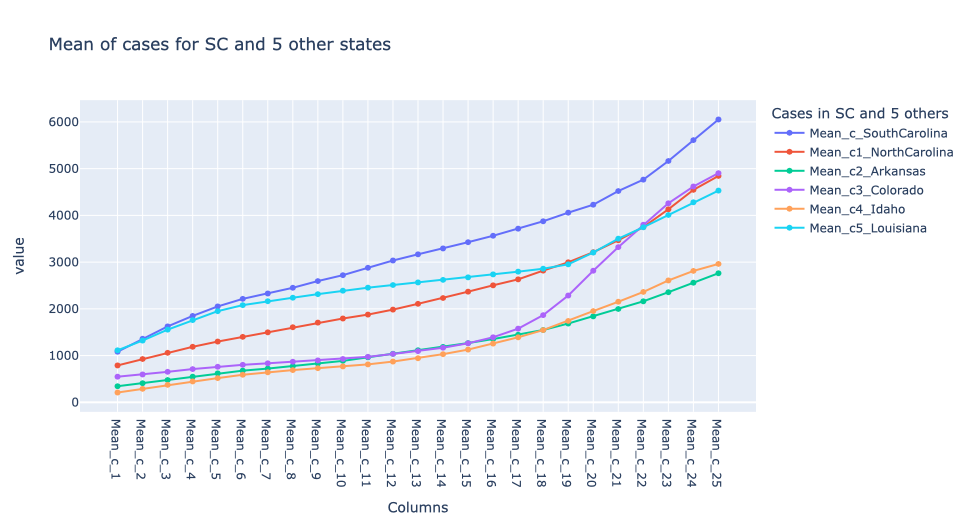


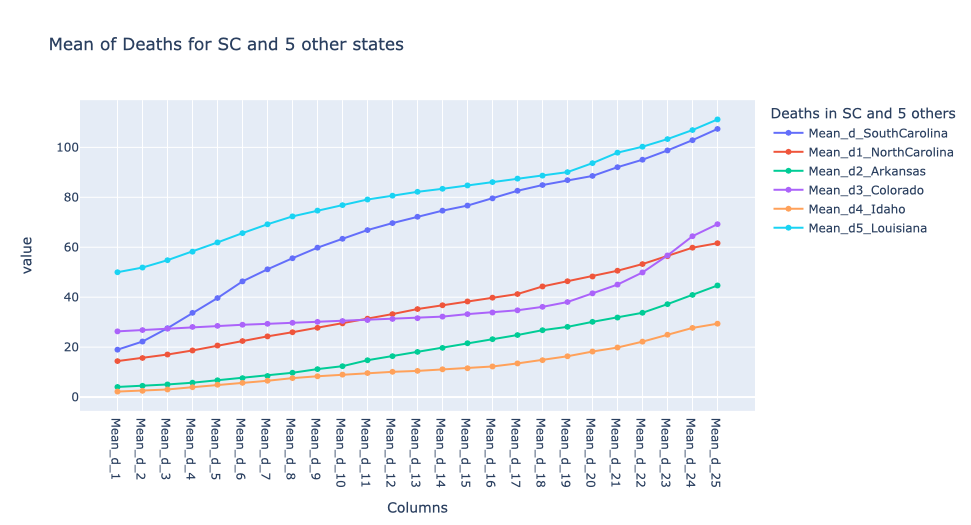

* Upon reviewing the two graphs, 
* observations for the first graph, representing the mean of cases, include:
  - A steady increase in cases from July to December 2020.
  - South Carolina exhibited the highest mean of cases among the five other states.
  - Idaho recorded the lowest mean of cases.
* As for the second graph, illustrating the mean of deaths, the observations are:
  - Louisiana reported the highest mean of deaths compared to any other state.
  - Idaho had the lowest number of deaths registered.

#### Ploting Graphs to understand the median of cases and deaths of each state and compare with SC

In [27]:
#ploting the weekly median values of cases of the state SC along with 5 other states in US
fig = px.line(x=median_columns.index, y=[median_columns.values,median_c1.values,median_c2.values,median_c3.values,median_c4.values,median_c5.values], labels={'x': 'Columns', 'y': 'Median'},title='Median of Cases for SC and 5 other states',markers=True)
custom_legend_labels = ['Median_c_SouthCarolina', 'Median_c1_NorthCarolina', 'Median_c2_Arkansas','Median_c3_Colorado','Median_c4_Idaho','Median_c5_Louisiana']
fig.update_layout(legend=dict(title="Cases in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()


#ploting the weekly median values of deaths of the state SC along with 5 other states in US
fig = px.line(x=median_columns1.index, y=[median_columns1.values,median_d1.values,median_d2.values,median_d3.values,median_d4.values,median_d5.values], labels={'x': 'Columns', 'y': 'Mean'},title='Median of Deaths for SC and 5 other states',markers=True)
custom_legend_labels = ['Median_d_SouthCarolina', 'Median_d1_NorthCarolina', 'Median_d2_Arkansas','Median_d3_Colorado','Median_d4_Idaho','Median_d5_Louisiana']
fig.update_layout(legend=dict(title="Deaths in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()


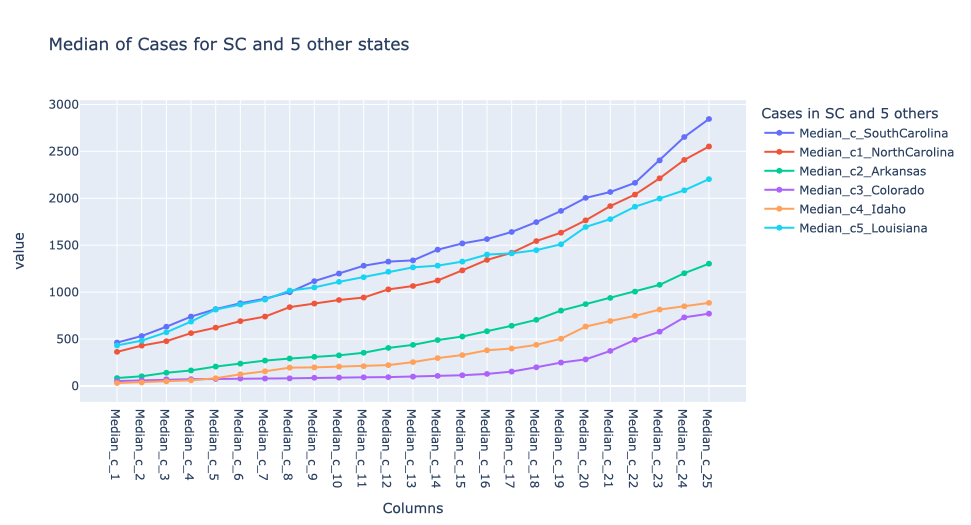

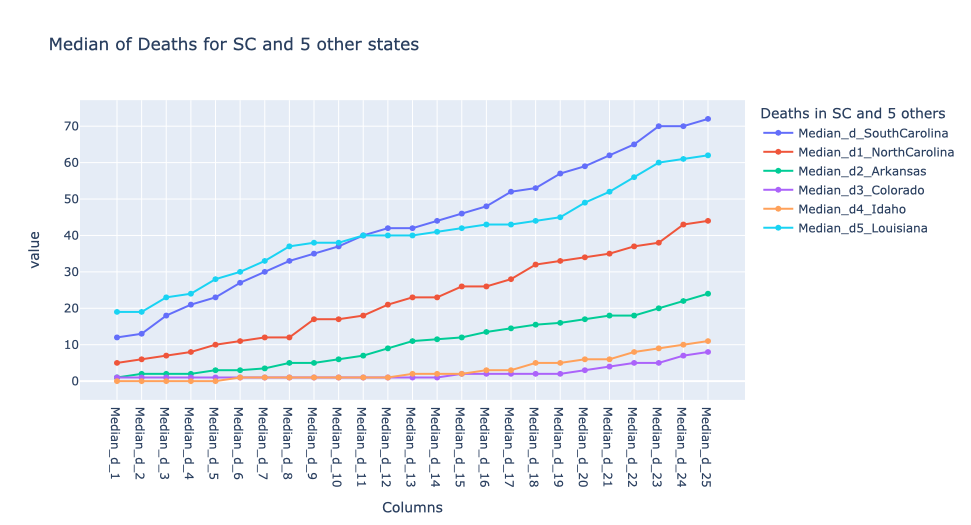

* Upon analyzing the two graphs above, 
  * The observations for the median of cases graph are as follows:
    - The median of cases shows a steady increase from July to December in all states.
    - South Carolina, North Carolina, and Louisiana exhibit higher median values compared to the other three states for the median of cases.
  * For the median of death graph:
    - The median values were initially stable but became more dispersed towards the end of December.
    - South Carolina has the highest median values for deaths.
    - Colorado has the least median values compared to other states.
#### Ploting Graphs to understand the mode of cases and deaths of each state and compare with SC

In [28]:
#ploting the weekly mode values of cases of the state SC along with 5 other states in US
fig = px.line(x=mode_columns.index, y=[mode_columns.values,mode_c1.values,mode_c2.values,mode_c3.values,mode_c4.values,mode_c5.values], labels={'x': 'Columns', 'y': 'Mode'},title='Mode of Cases for SC and 5 other states',markers=True)
custom_legend_labels = ['Mode_c_SouthCarolina', 'Mode_c1_NorthCarolina', 'Mode_c2_Arkansas','Mode_c3_Colorado','Mode_c4_Idaho','Mode_c5_Louisiana']
fig.update_layout(legend=dict(title="Cases in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()

#ploting the weekly mode values of cases of the state SC along with 5 other states in US
fig = px.line(x=mode_columns1.index, y=[mode_columns1.values,mode_d1.values,mode_d2.values,mode_d3.values,mode_d4.values,mode_d5.values], labels={'x': 'Columns', 'y': 'Mode'},title='Mode of Deaths for SC and 5 other states',markers=True)
custom_legend_labels = ['Mode_d_SouthCarolina', 'Mode_d1_NorthCarolina', 'Mode_d2_Arkansas','Mode_d3_Colorado','Mode_d4_Idaho','Mode_d5_Louisiana']
fig.update_layout(legend=dict(title="Deaths in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()

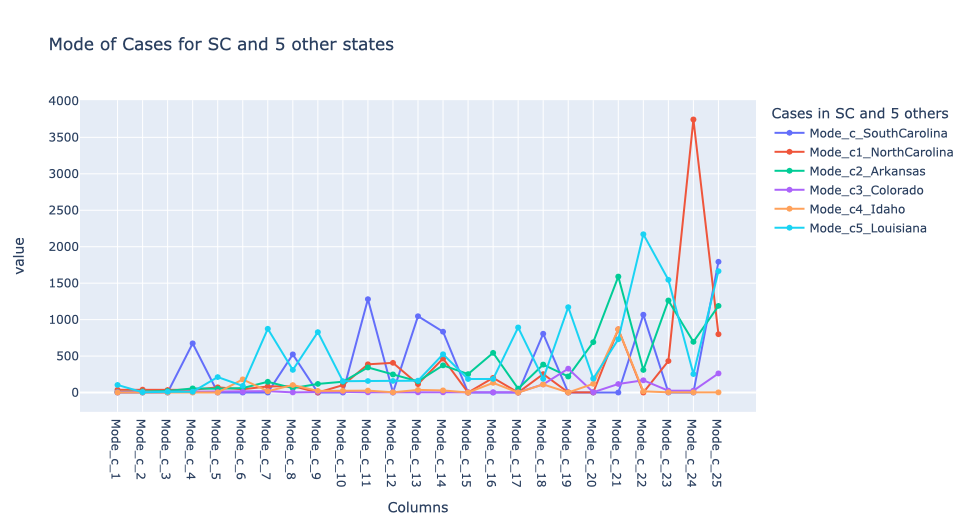

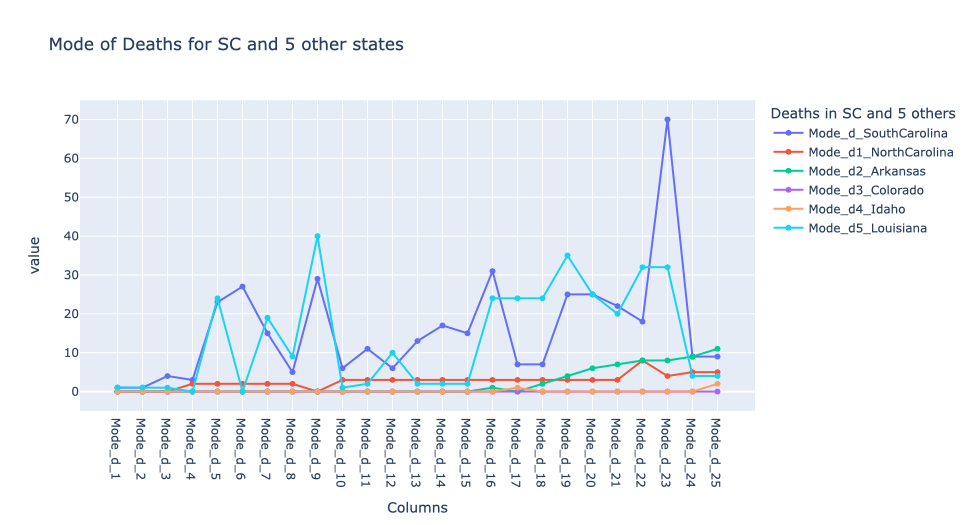

* Observations from the two graphs are as follows:
  * For the mode of cases graph:
    - The mode values for North Carolina, Colorado, and Idaho are predominantly near zero.
    - The mode values for several states exhibit noticeable fluctuations.
    - North Carolina's data displays the highest mode values.
  * For the mode of death graph:
    - The majority of mode values are either zero or around zero for North Carolina, Arkansas, Colorado, and Idaho.
    - South Carolina and Louisiana stand out with high mode values compared to other states.


# Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population).
#### Filtering rows and colums to calculate the log normalized values for SC and 5 other states

In [29]:
#filtering rows and columns to calculate log normalized values
SC_c= cases.loc[condition,date_columns].sum()  
SC_d=deaths.loc[condition1,date_columns].sum() 
NC_c= cases.loc[c1,date_columns].sum()         
NC_d=deaths.loc[d1,date_columns].sum()         
AR_c= cases.loc[c2,date_columns].sum()         
AR_d=deaths.loc[d2,date_columns].sum()         
CO_c= cases.loc[c3,date_columns].sum()         
CO_d=deaths.loc[d3,date_columns].sum()         
ID_c= cases.loc[c4,date_columns].sum()        
ID_d=deaths.loc[d4,date_columns].sum()         
LA_c= cases.loc[c5,date_columns].sum()         
LA_d=deaths.loc[d5,date_columns].sum()         

#filtering population values for each state
p=population.loc[population['State']=="SC",'population'].sum()
p1=population.loc[population['State']=="NC",'population'].sum()
p2=population.loc[population['State']=="AR",'population'].sum()
p3=population.loc[population['State']=="CO",'population'].sum()
p4=population.loc[population['State']=="ID",'population'].sum()
p5=population.loc[population['State']=="LA",'population'].sum()

#### Calculating log normalized values for cases and deaths for Sc and 5 other states

In [30]:
norm= 10000

# calculating log normalized values for cases
n_c=((SC_c/p)*norm).agg(np.log10)
n_c1=((NC_c/p1)*norm).agg(np.log10)
n_c2=((AR_c/p2)*norm).agg(np.log10)
n_c3=((CO_c/p3)*norm).agg(np.log10)
n_c4=((ID_c/p4)*norm).agg(np.log10)
n_c5=((LA_c/p5)*norm).agg(np.log10)

# calculating log normalized values for deaths
n_d=((SC_d/p)*norm).agg(np.log10)
n_d1=((NC_d/p1)*norm).agg(np.log10)
n_d2=((AR_d/p2)*norm).agg(np.log10)
n_d3=((CO_d/p3)*norm).agg(np.log10)
n_d4=((ID_d/p4)*norm).agg(np.log10)
n_d5=((LA_d/p5)*norm).agg(np.log10)


In the above section, normalization was carried out using the formula:

* Normalized Cases=( Total Population/Total Cases)×Normalization Factor
* Normalized Deaths=(Total Deaths/Total Population)×Normalization Factor
* Here, the normalization factor employed is 10,000. 
* Following this normalization, the values were further subjected to log normalization using the np.log10 method. * As a result, log-normalized values for cases and deaths were computed for South Carolina (SC) and five other states.
## Plot the values across the weeks in a line plot for the 5 states in a single graph. 
#### Ploting  the log normalized vlues for Sc and 5 other states

In [31]:
#ploting the log normalized values of  cases of the state SC along with 5 other states in US
fig = px.line(x=n_c.index, y=[n_c.values,n_c1.values,n_c2.values,n_c3.values,n_c4.values,n_c5.values], labels={'x': 'Columns', 'y': 'normalized values for cases'},title='Normalized values of Cases for SC and 5 other states')
custom_legend_labels = ['Norm_c_SouthCarolina', 'Norm_c1_NorthCarolina', 'Norm_c2_Arkansas','Norm_c3_Colorado','Norm_c4_Idaho','Norm_c5_Louisiana']
fig.update_layout(legend=dict(title="Normalized values in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()


#ploting the log normalized values of deaths of the state SC along with 5 other states in US
fig = px.line(x=n_d.index, y=[n_d.values,n_d1.values,n_d2.values,n_d3.values,n_d4.values,n_d5.values], labels={'x': 'Columns', 'y': 'normalized values for deaths'},title='Normalized values of Deaths for SC and 5 other states')
custom_legend_labels = ['Norm_d_SouthCarolina', 'Norm_d1_NorthCarolina', 'Norm_d2_Arkansas','Norm_d3_Colorado','Norm_d4_Idaho','Norm_d5_Louisiana']
fig.update_layout(legend=dict(title="Normalized values in SC and 5 others", traceorder='normal', itemsizing='trace'))
for i, label in enumerate(custom_legend_labels):
    fig.data[i].name = label
#fig.show()

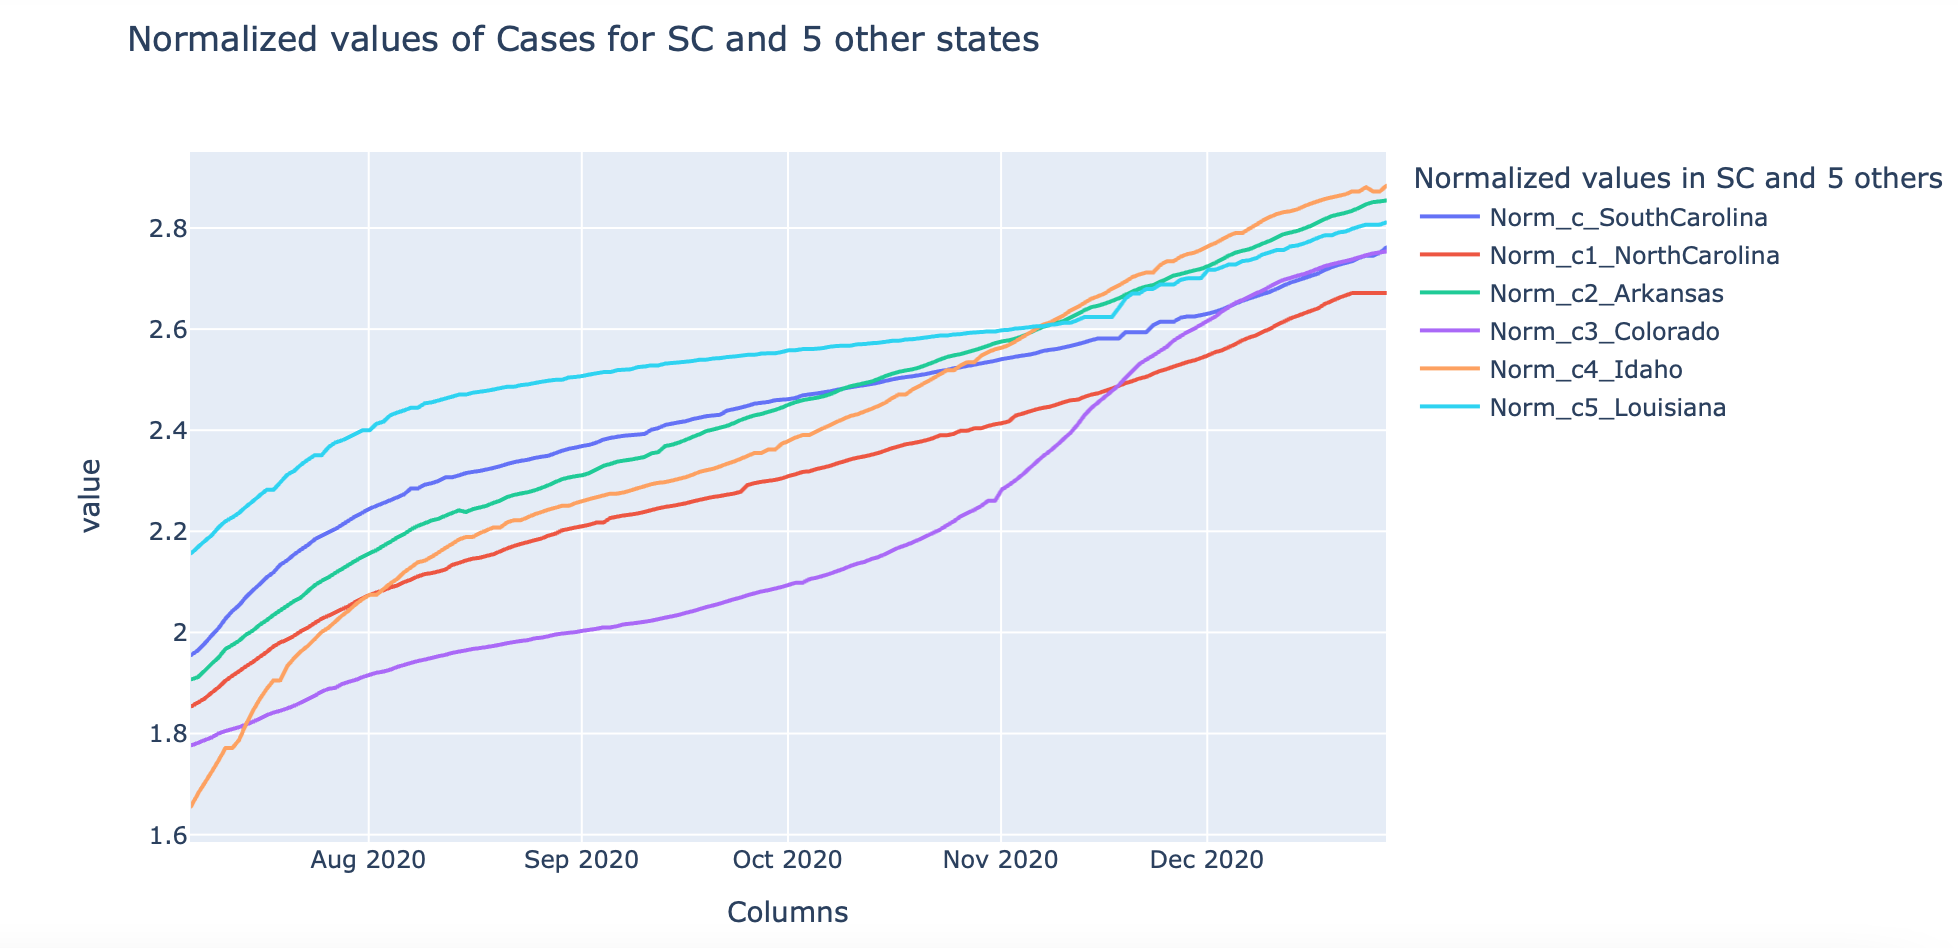

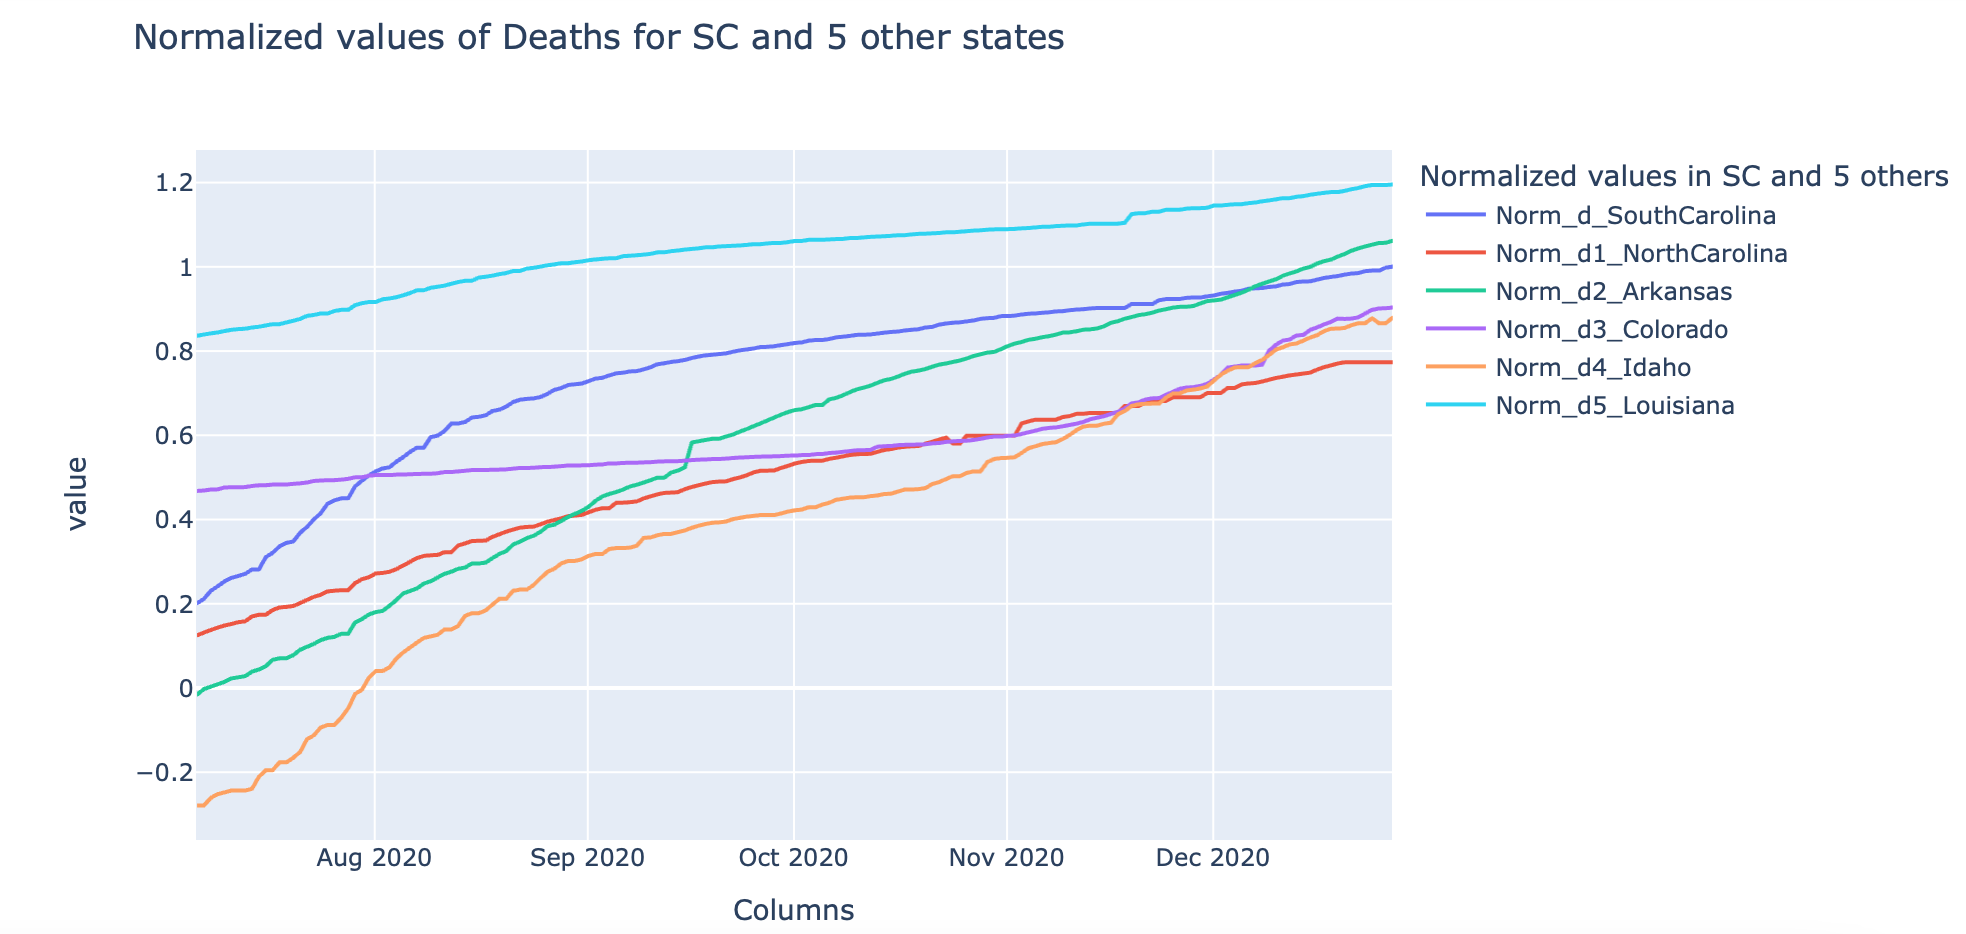

* Analysis of the two provided graphs for normalized values of cases in South Carolina (SC) and five other states reveals the following:
  * For the Normalized Values of Cases in SC and 5 Others Graph:
    - The cases for all states demonstrated an increasing trend from July to December 2020.
    - Louisiana recorded the highest number of cases.
    - Colorado reported the lowest number of cases among the considered states.
  * For the Normalized Values of Deaths in SC and 5 Others Graph:
    - In contrast to cases, the values for deaths are dispersed but show a slight increase from July to December 2020.
    - Louisiana had the highest number of deaths registered.
    - Idaho had the lowest number of deaths among the other states.

## Graphs of cases and deaths of US data

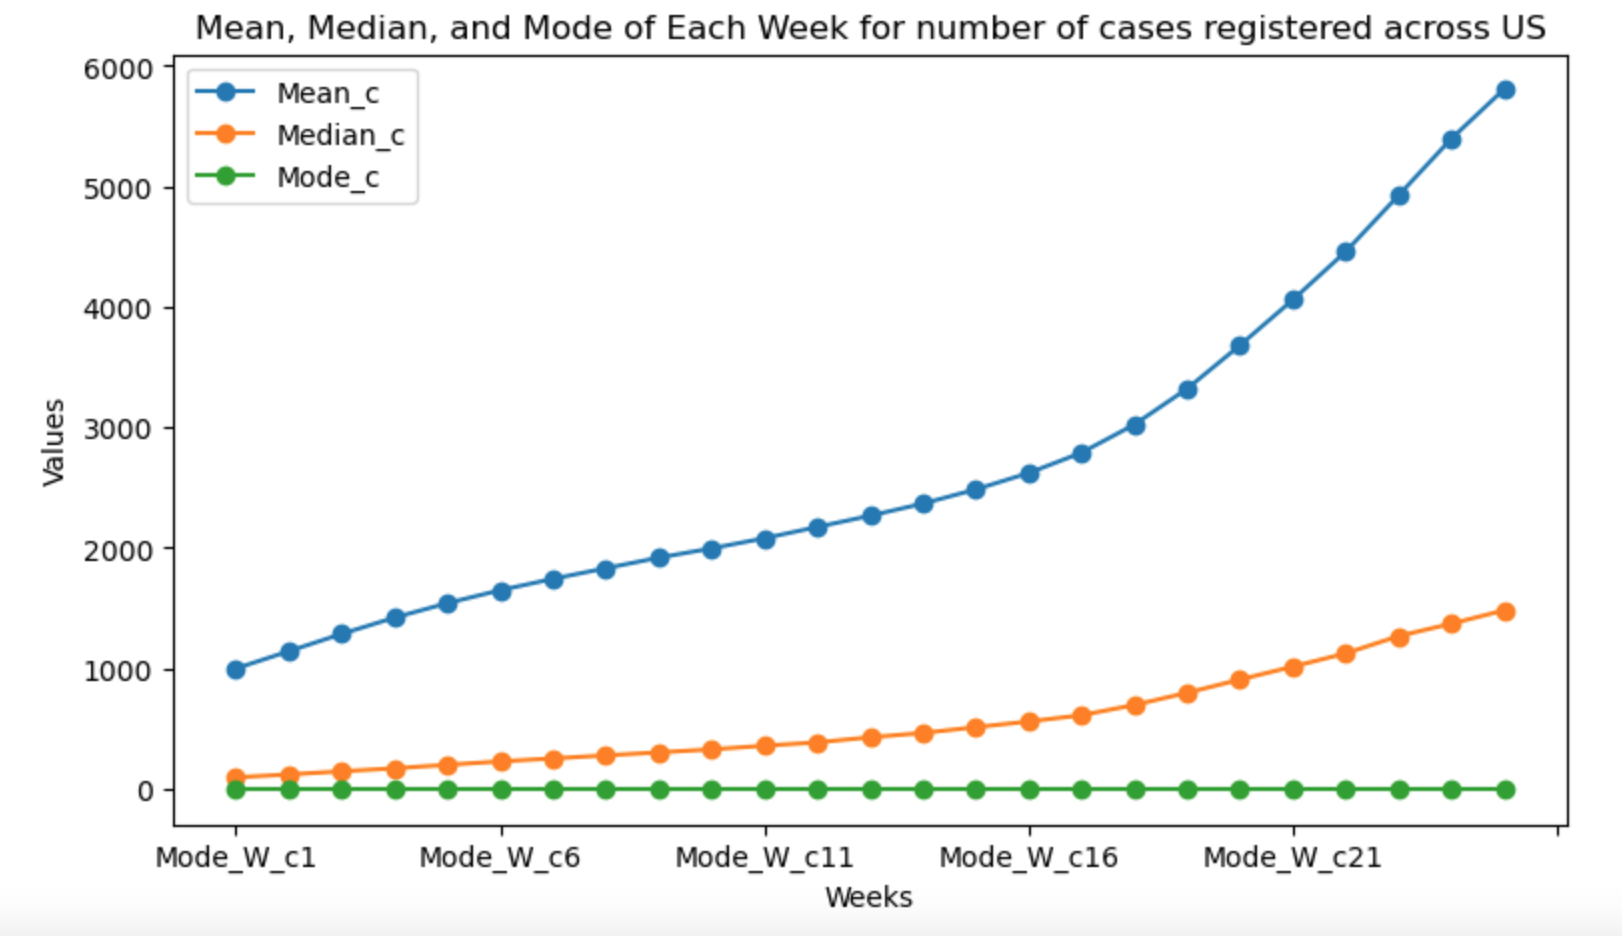

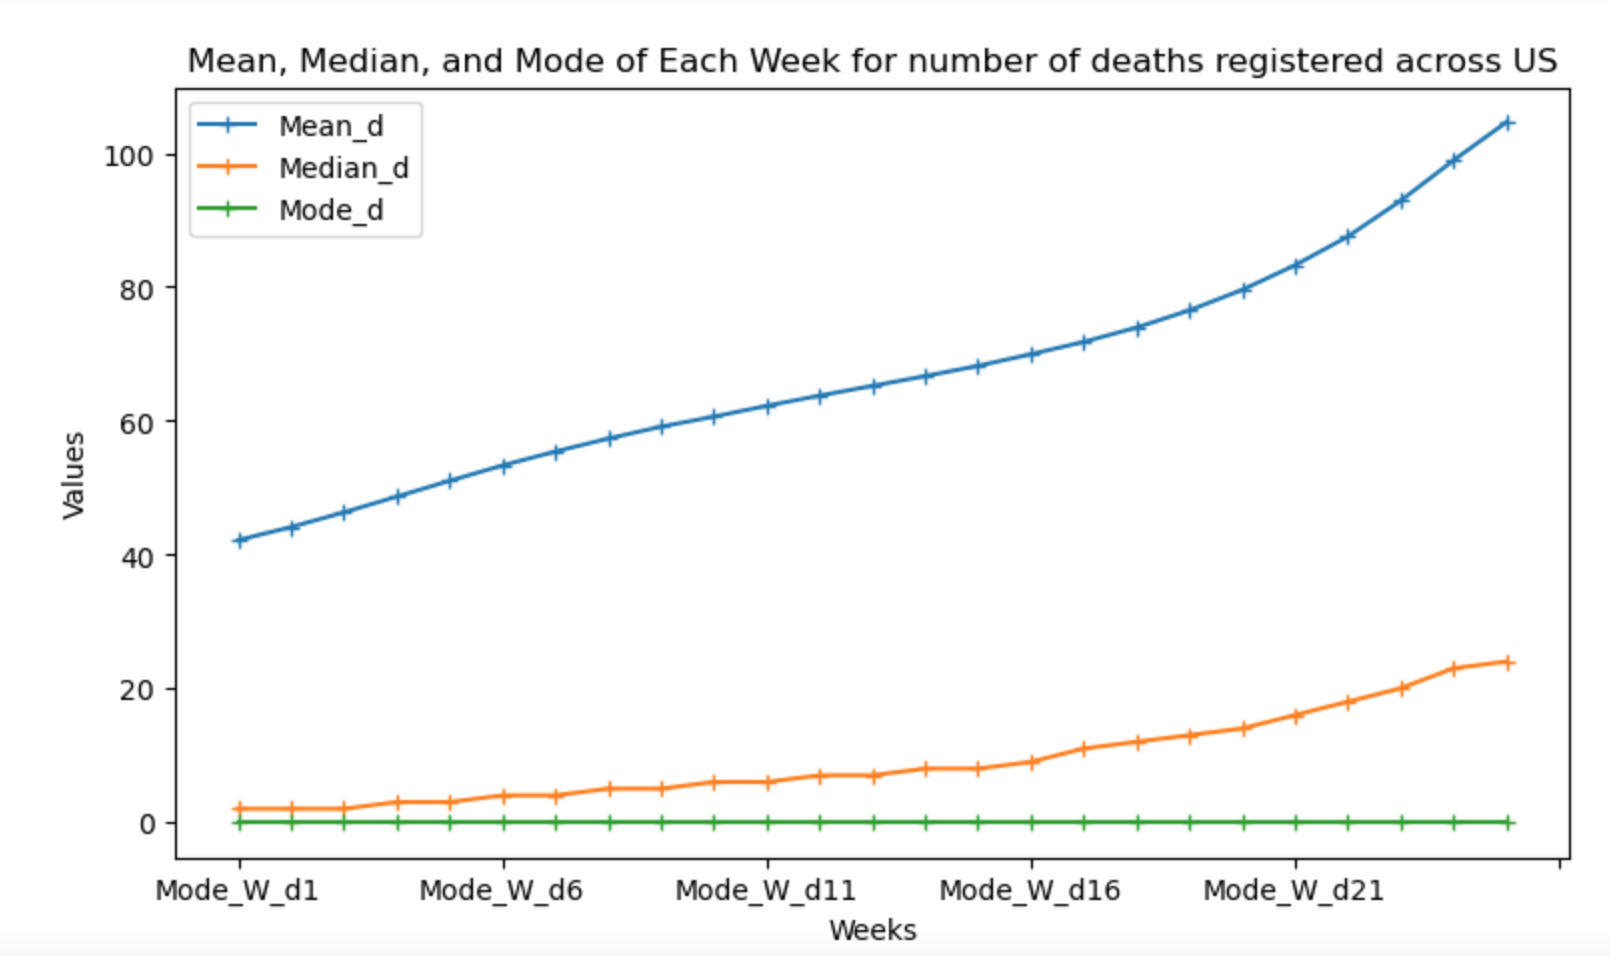

### Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern

Upon analyzing the provided data and graphs, two significant factors emerge when considering variations in state values: weather and population.

  * Weather Influence:
    - Different states exhibit varying climates or weather conditions, which could contribute to fluctuations in the reported cases.
    - Climatic differences may impact the spread or containment of the virus, leading to distinct patterns across states.
  * Population Dynamics:
    - States with higher population densities might experience a more pronounced impact in terms of increased cases compared to less populated states.
    - The population factor plays a crucial role in the overall dynamics of the virus spread and its effect on public health.
  * Regarding peaks:

    - The graphs for both states and the entire US show similar patterns but not identical.
    - Initially, the values remain relatively constant, but as the weeks progress, disparities become evident.
    - It is confirmed that the month of December, particularly the last weeks, consistently records the highest values for both cases and deaths across the majority of the graph lines.

In summary, considering weather conditions and population sizes is crucial for understanding the variations in COVID-19 cases among different states. The commonality in the peak values, especially in December, underscores the significance of this period in contributing to elevated case and death numbers across states and the entire country.


# Identify five counties within a state of your choice with high cases and death rates.

In [32]:
condition = cases['State'] == "SC"
con1=deaths['State'] == "SC"
filtered_df = cases[condition]
filtered_df1=deaths[con1]
# Get the top 5 rows with the largest values in the specified column within the filtered DataFrame
top_5_rows = filtered_df.nlargest(5, '2020-12-27')
top=filtered_df1.nlargest(5, '2020-12-27')
# Select specific columns for those rows
selected_columns = ['countyFIPS','County Name','State','2020-12-27']  # Replace with your actual column names

# Use loc to get the desired columns for the top 5 rows
result = top_5_rows.loc[:, selected_columns]
result1 = top.loc[:, selected_columns]

### Analysis for counties with high cases and deaths
* The dataset available to us contains the cumulative sum of cases and deaths recorded each day.
* This implies that the data for December 27, 2020, reflects the total cumulative cases until that specific date.
* Taking this into account, we can infer that the column dated December 27 already represents the sum of all cases up to that day.
* Therefore, to identify the county with the highest registered cases, we can simply utilize the "n largest" function on the dated column.
* Employing this approach allows us to obtain the top 5 values for both cases and deaths.

In [33]:
result

,countyFIPS,County Name,State,2020-12-27
2379,45045,Greenville County,SC,35719
2396,45079,Richland County,SC,25583
2366,45019,Charleston County,SC,23511
2382,45051,Horry County,SC,19454
2398,45083,Spartanburg County,SC,19121


* The above data shows the highest number of cases in the specified timeline in Sc state

In [34]:
result1

,countyFIPS,County Name,State,2020-12-27
2379,45045,Greenville County,SC,485
2398,45083,Spartanburg County,SC,371
2396,45079,Richland County,SC,330
2366,45019,Charleston County,SC,320
2382,45051,Horry County,SC,309


* The above data shows the highest number of cases in the specified timeline in Sc state

# Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. 

In [35]:
weekly_mean_c=pd.DataFrame()
weekly_median_c=pd.DataFrame()
weekly_mode_c=pd.DataFrame()

normalized=pd.DataFrame()

cas=cases[condition] # condition for filtering rows
date_columns = cas.columns[(cases.columns >= start_date) & (cas.columns <= end_date)]# start and end dates
selected_counties = [45045,45079,45019,45051,45083] # selected county Fips
selected_rows = cas['countyFIPS'].isin(selected_counties) #filtering counties

sc_selected_counties = cases[condition&selected_rows]

date_columns1= sc_selected_counties.columns[(sc_selected_counties.columns >= start_date) & (sc_selected_counties.columns <= end_date)]

n_county_c=pd.DataFrame()
# calculating weekly statistics for the selected counties
for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))
    current_week_columns = date_columns1[week_start:week_end]
    
    n_county_c[f'w_d{i//7 + 1}']=sc_selected_counties[current_week_columns].sum(axis=1)

    weekly_mean_c[f'Mean_w_c{i//7 + 1}'] = sc_selected_counties[current_week_columns].mean(axis=1)
    weekly_median_c[f'Median_w_c{i//7 + 1}'] = sc_selected_counties[current_week_columns].median(axis=1)
    weekly_mode_c[f'Mode_w_c{i//7 + 1}'] = sc_selected_counties[current_week_columns].mode(axis=1).iloc[:, 0]


n_county_c=n_county_c.sum(axis=1)
n_county_c

2366    2743429
2379    2882563
2382    1971138
2396    2551048
2398    1391581
dtype: int64

* the above data represents the total sum of cases of the counties from july 6th to december 27 of 2020
* in the above cell we calculated the weekly mean, median, mode for cases for the selected counties

In [36]:
weekly_mean_c

,Mean_w_c1,Mean_w_c2,Mean_w_c3,Mean_w_c4,Mean_w_c5,Mean_w_c6,Mean_w_c7,Mean_w_c8,Mean_w_c9,Mean_w_c10,...,Mean_w_c16,Mean_w_c17,Mean_w_c18,Mean_w_c19,Mean_w_c20,Mean_w_c21,Mean_w_c22,Mean_w_c23,Mean_w_c24,Mean_w_c25
2366,6695.000000,8671.857143,10132.285714,11193.714286,12014.428571,12645.571429,13110.428571,13628.857143,14242.428571,14651.000000,...,16848.285714,17260.857143,17728.000000,18262.142857,18789.857143,19688.142857,20342.142857,21265.428571,22190.285714,23036.428571
2379,6490.571429,7827.428571,8967.285714,9849.857143,10612.571429,11131.857143,11417.285714,11885.571429,12344.571429,12878.857143,...,16805.714286,17756.857143,18747.857143,20019.142857,21233.857143,23223.714286,24887.142857,27558.428571,30688.000000,33874.571429
2382,5218.000000,6337.714286,7159.714286,7847.571429,8374.571429,8755.000000,8999.857143,9234.285714,9473.142857,9711.142857,...,12105.857143,12497.142857,12850.000000,13341.714286,13823.857143,14595.857143,15316.285714,16431.571429,17521.714286,18718.857143
2396,4428.428571,5472.857143,6561.857143,7431.714286,8305.285714,9134.428571,9672.000000,10362.142857,11709.428571,12847.000000,...,16858.000000,17357.571429,17957.714286,18581.857143,19137.571429,20120.714286,20926.142857,22219.857143,23620.571429,24923.142857
2398,2179.857143,2809.714286,3285.142857,3595.000000,3951.000000,4279.142857,4570.285714,4854.142857,5282.714286,5724.714286,...,8489.285714,9114.285714,9681.142857,10344.285714,10981.000000,12097.571429,13049.000000,14684.142857,16440.571429,18159.142857


In [42]:
weekly_mean_d=pd.DataFrame()
weekly_median_d=pd.DataFrame()
weekly_mode_d=pd.DataFrame()
n_county_d=pd.DataFrame()

dea=deaths[condition]
Row=[]
selected_counties = [45045,45079,45019,45051,45083]
selected_rows1 = dea['countyFIPS'].isin(selected_counties)

sc_selected_counties1= deaths[condition&selected_rows1]

date_columns2= sc_selected_counties1.columns[(sc_selected_counties1.columns >= start_date) & (sc_selected_counties1.columns <= end_date)]

for i in range(0, len(date_columns), 7):
    week_start = i
    week_end = min(i + 7, len(date_columns))

    # Select columns for the current week
    current_week_columns1 = date_columns2[week_start:week_end]
    
    n_county_d[f'w_d{i//7 + 1}']=sc_selected_counties1[current_week_columns1].sum(axis=1)

    
    # Create a new DataFrame with the mean, median, and mode of values for the current week
    weekly_mean_d[f'Mean_w_d{i//7 + 1}'] = sc_selected_counties1[current_week_columns1].mean(axis=1)
    weekly_median_d[f'Median_w_d{i//7 + 1}'] = sc_selected_counties1[current_week_columns1].median(axis=1)
    weekly_mode_d[f'Mode_w_d{i//7 + 1}'] = sc_selected_counties1[current_week_columns1].mode(axis=1).iloc[:, 0]

n_county_d=n_county_d.sum(axis=1)
n_county_d

2366    41607
2379    52317
2382    34868
2396    39732
2398    33795
dtype: int64

* the above data represents the total sum of deaths of the counties from july 6th to december 27 of 2020
* in the above cell we calculated the weekly mean, median, mode for deaths for the selected counties

In [43]:
weekly_mode_d

,Mode_w_d1,Mode_w_d2,Mode_w_d3,Mode_w_d4,Mode_w_d5,Mode_w_d6,Mode_w_d7,Mode_w_d8,Mode_w_d9,Mode_w_d10,...,Mode_w_d16,Mode_w_d17,Mode_w_d18,Mode_w_d19,Mode_w_d20,Mode_w_d21,Mode_w_d22,Mode_w_d23,Mode_w_d24,Mode_w_d25
2366,36.0,65,114.0,125.0,172,209.0,217.0,226.0,242.0,249.0,...,271,277.0,283.0,285.0,290,293.0,294.0,301,305.0,319.0
2379,102.0,106,132.0,153.0,189,222.0,243.0,256.0,266.0,270.0,...,334,350.0,360.0,372.0,380,401.0,407.0,425,445.0,464.0
2382,55.0,75,103.0,104.0,138,167.0,177.0,178.0,188.0,189.0,...,223,227.0,236.0,244.0,254,266.0,269.0,277,284.0,299.0
2396,98.0,99,109.0,125.0,145,159.0,178.0,185.0,196.0,204.0,...,265,269.0,277.0,284.0,291,298.0,302.0,310,315.0,322.0
2398,57.0,57,63.0,74.0,92,111.0,127.0,127.0,163.0,172.0,...,220,238.0,246.0,251.0,262,271.0,277.0,300,324.0,347.0


In [52]:
df_d1= pd.DataFrame(weekly_mean_d)
fig = go.Figure()
for index, row in df_d1.iterrows():
    fig.add_trace(go.Scatter(x=df_d1.columns[1:], y=row[1:], mode='lines+markers', name=f'Row {index}'))
fig.update_layout(title='Mean values of top 5 with highest deaths registered',
                  xaxis_title='Columns',
                  yaxis_title='Values')
#fig.show()



df_d2= pd.DataFrame(weekly_median_d)
fig = go.Figure()
for index, row in df_d2.iterrows():
    fig.add_trace(go.Scatter(x=df_d2.columns[1:], y=row[1:], mode='lines+markers', name=f'Row {index}'))
fig.update_layout(title='Median values of top 5 with highest deaths registered',
                  xaxis_title='Columns',
                  yaxis_title='Values')
#fig.show()



df_d3= pd.DataFrame(weekly_mode_d)
fig = go.Figure()
for index, row in df_d3.iterrows():
    fig.add_trace(go.Scatter(x=df_d3.columns[1:], y=row[1:], mode='lines+markers', name=f'Row {index}'))
fig.update_layout(title='Mode values of top 5 with highest deaths registered',
                  xaxis_title='Columns',
                  yaxis_title='Values')
#fig.show()

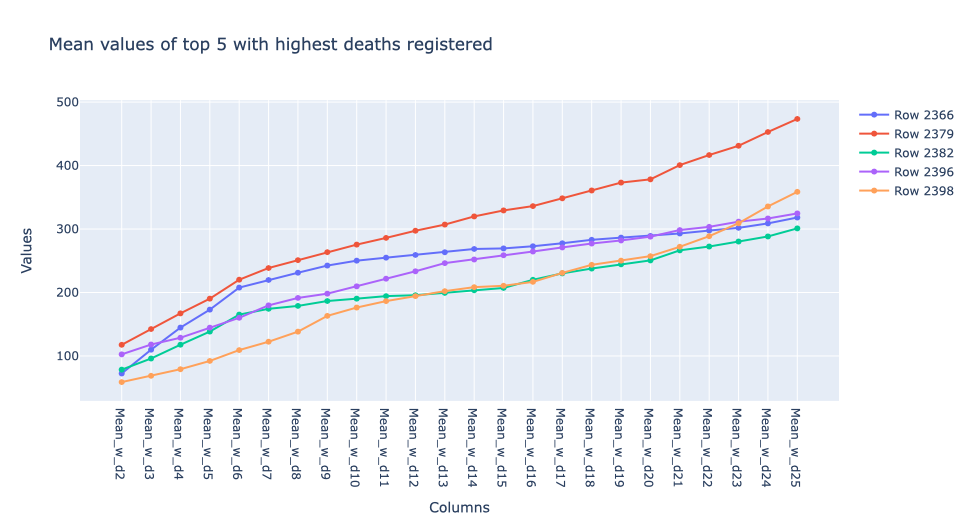

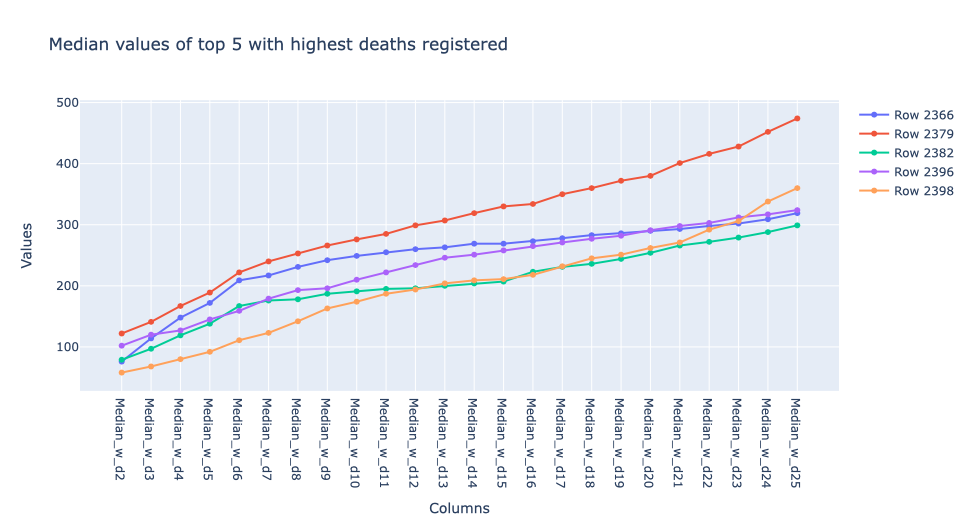

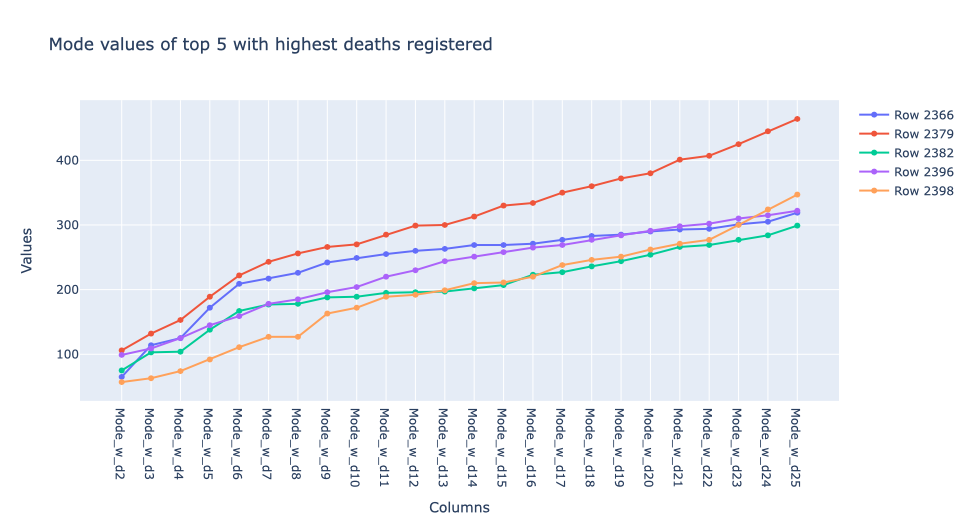

In [45]:
df_c1= pd.DataFrame(weekly_mean_c)
fig = go.Figure()
for index, row in df_c1.iterrows():
    fig.add_trace(go.Scatter(x=df_c1.columns[1:], y=row[1:], mode='lines+markers', name=f'Row {index}'))
fig.update_layout(title='Mean values of top 5 counties with highest cases registered',
                  xaxis_title='Columns',
                  yaxis_title='Values')
#fig.show()



df_c2= pd.DataFrame(weekly_median_c)
fig = go.Figure()
for index, row in df_c2.iterrows():
    fig.add_trace(go.Scatter(x=df_c2.columns[1:], y=row[1:], mode='lines+markers', name=f'Row {index}'))
fig.update_layout(title='Me values of top 5 counties with highest cases registered',
                  xaxis_title='Columns',
                  yaxis_title='Values')
#fig.show()



df_c3= pd.DataFrame(weekly_mode_c)
fig = go.Figure()
for index, row in df_c3.iterrows():
    fig.add_trace(go.Scatter(x=df_c3.columns[1:], y=row[1:], mode='lines+markers', name=f'Row {index}'))
fig.update_layout(title='Mode values of top 5 counties with highest cases registered',
                  xaxis_title='Columns',
                  yaxis_title='Values')

#fig.show()

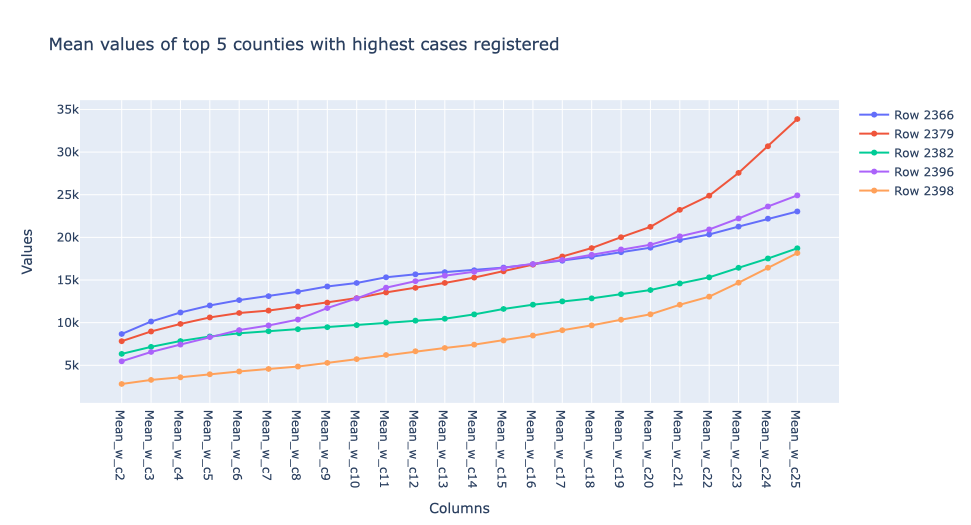

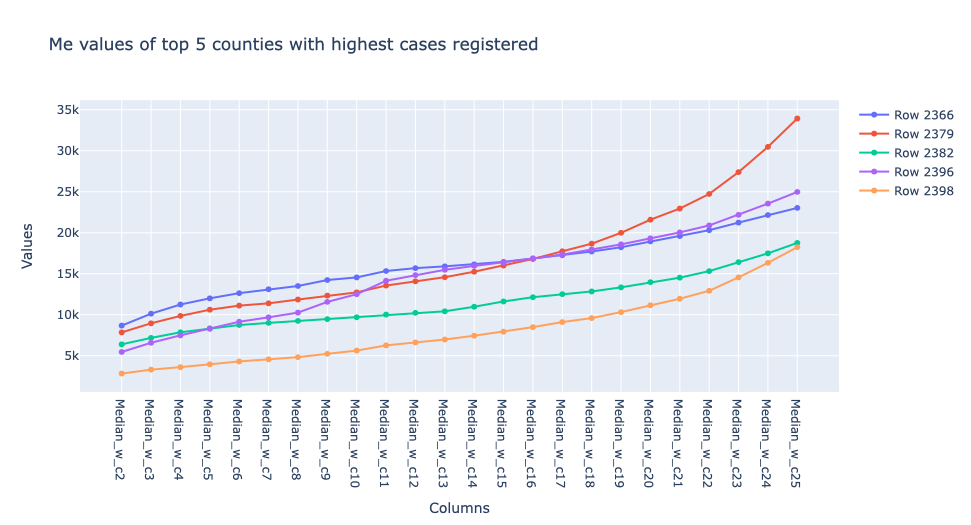

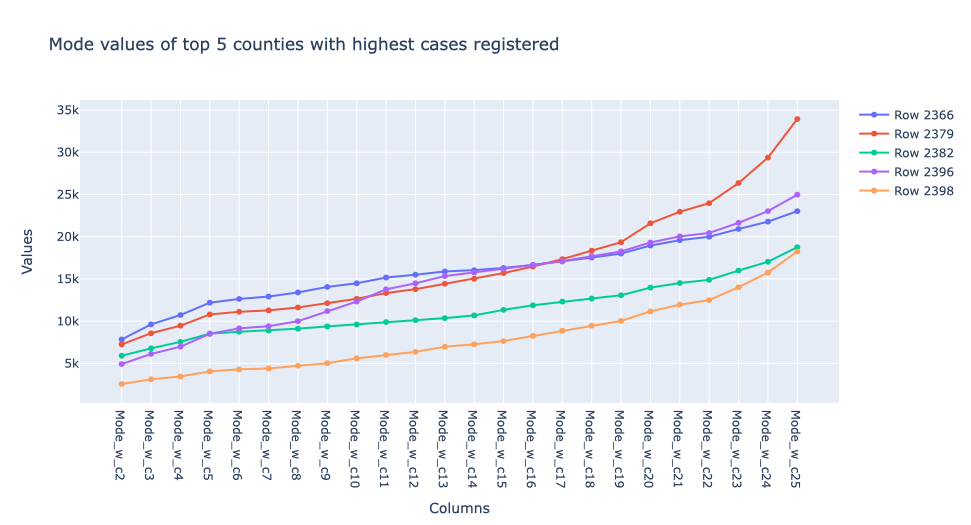

## Calculating log normalized values for the total cases and deaths of the 5 counties

In [46]:
county_names = ['Charleston County', 'Greenville County', 'Horry County', 'Richland County', 'Spartanburg County']
df = pd.DataFrame(list(n_county_d.items()), columns=['Index', 'n_county_d'])
df['county_name'] = county_names
df1= pd.DataFrame(list(n_county_c.items()), columns=['Index', 'n_county_c'])
df1['county_name'] = county_names
print(df1)
print(df)

   Index  n_county_c         county_name
0   2366     2743429   Charleston County
1   2379     2882563   Greenville County
2   2382     1971138        Horry County
3   2396     2551048     Richland County
4   2398     1391581  Spartanburg County
   Index  n_county_d         county_name
0   2366       41607   Charleston County
1   2379       52317   Greenville County
2   2382       34868        Horry County
3   2396       39732     Richland County
4   2398       33795  Spartanburg County


* the above data represents the total for cases and deats for each counties
#### Normalizing the cases and deaths values

In [47]:
import numpy as np
norm=10000

#45045,45079,45019,45051,45083

p1=population.loc[population['countyFIPS']==45045,'population']
p2=population.loc[population['countyFIPS']==45079,'population']
p3=population.loc[population['countyFIPS']==45019,'population']
p4=population.loc[population['countyFIPS']==45051,'population']
p5=population.loc[population['countyFIPS']==45083,'population']




#### As mentioned in the above cells we use a normalization factor to normalize the total cases and death values

In [48]:

n_county_c_list = [n_county_c.iloc[i] for i in range(5)]
n_county_d_list = [n_county_d.iloc[i] for i in range(5)]
p_values = [p1, p2, p3, p4, p5]

counties_c = pd.DataFrame()
counties_d = pd.DataFrame()

for i in range(5):
    # Assuming norm is defined
    county_c_values = ((n_county_c_list[i] / p_values[i]) * norm).agg(np.log10)
    county_d_values = ((n_county_d_list[i] / p_values[i]) * norm).agg(np.log10)

    # Append to DataFrames
    counties_c = pd.concat([counties_c, county_c_values], ignore_index=True)
    counties_d = pd.concat([counties_d, county_d_values], ignore_index=True)

# Rename the columns if needed
counties_c.columns = ['log_population']
counties_d.columns = ['log_population']

# Add county names to the DataFrames
county_names = ['Charleston County', 'Greenville County', 'Horry County', 'Richland County', 'Spartanburg County']

counties_c['county_name'] = county_names
counties_d['county_name'] = county_names

print(counties_c)
print(counties_d)

   log_population         county_name
0        4.719342   Charleston County
1        4.840937   Greenville County
2        4.680446        Horry County
3        4.857616     Richland County
4        4.638650  Spartanburg County
   log_population         county_name
0        2.900215   Charleston County
1        3.099801   Greenville County
2        2.928156        Horry County
3        3.050038     Richland County
4        3.023994  Spartanburg County


* The above data shows log normalized values for cases and death for selected counties
#### Ploting raw and log normalized values for the selected counties

In [49]:
tra = go.Scatter(x=df1['county_name'], y=df1['n_county_c'], mode='lines', name='cases_rawvalues')
tra1 = go.Scatter(x=df['county_name'], y=df['n_county_d'], mode='lines', name='deaths_rawvalues')

layout = go.Layout(
    title='raw for Each County',
    xaxis=dict(title='County Names', tickangle=45, tickmode='array', tickvals=counties_c['county_name'], ticktext=counties_c['county_name']),
    yaxis=dict(title='log_normalized'),
    showlegend=True,
)

fig = go.Figure(data=[tra, tra1], layout=layout)

#fig.show()

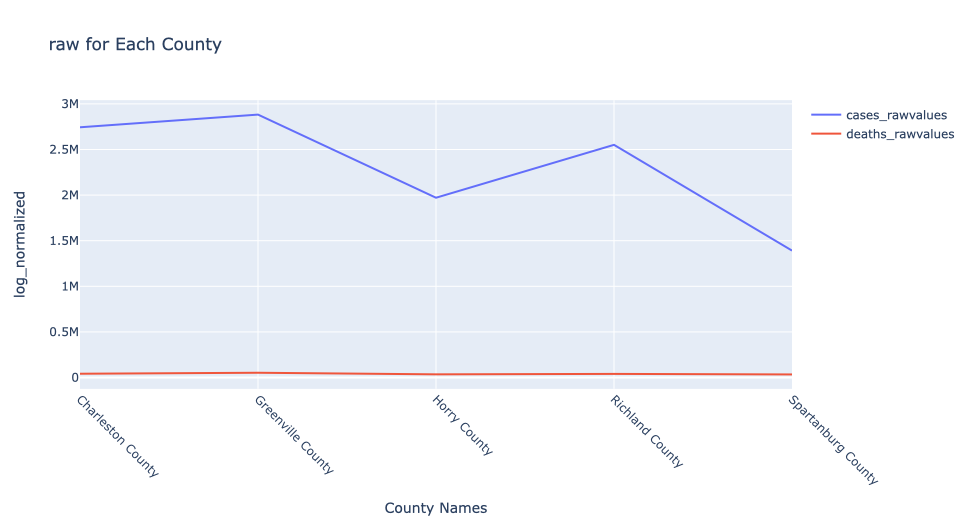

* The graph depicted above displays the unprocessed data.
* When plotting both cases and death values simultaneously, the graph indicates a consistently straight line for deaths.
* This phenomenon arises due to variations in the magnitudes of the two plotted lines.
* While the death line inherently comprises diverse values, the overlay with cases results in the appearance of a steady, straight line.
* To solve this convert the raw values to log normalized data
#### Ploting log normalized values

In [50]:
trace1 = go.Scatter(x=counties_c['county_name'], y=counties_c['log_population'], mode='lines', name='cases_logvalues')
trace2 = go.Scatter(x=counties_d['county_name'], y=counties_d['log_population'], mode='lines', name='deaths_population')

layout = go.Layout(
    title='log_normalized for Each County',
    xaxis=dict(title='County Names', tickangle=45, tickmode='array', tickvals=counties_c['county_name'], ticktext=counties_c['county_name']),
    yaxis=dict(title='log_normalized'),
    showlegend=True,
)

fig = go.Figure(data=[trace1, trace2], layout=layout)

#fig.show()

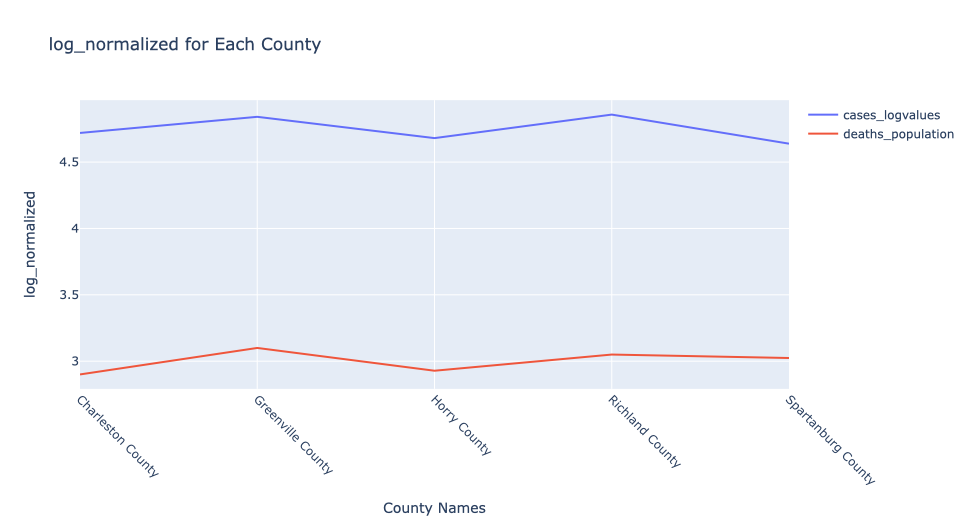

### Describe what is causing them and what were the peaks. Do the counties follow state pattern.

* Based on the comprehensive analysis conducted:
* Initially, it is evident that both cases and death figures exhibit an upward trend from July to December 2020 across various states and counties.
* The data and graphical representations suggest that both cases and deaths reached their peaks in the month of December.
* Notably, the highest peak values are concentrated in the last week of December.
* It's worth considering that December in the United States coincides with winter and the holiday season.
* This correlation might explain the surge in the rates of cases and deaths observed in both states and counties during this period.